# Восстановление золота из руды

Компания разрабатывает решения для эффективной работы промышленных предприятий. Подготовьте прототип модели машинного обучения.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Общие-выводы:" data-toc-modified-id="Общие-выводы:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общие выводы:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [ ]:
try:
    from ydata_profiling import ProfileReport
except:
    !pip install -q ydata-profiling
    from ydata_profiling import ProfileReport

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
from seaborn import heatmap, kdeplot
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
try:
    train = pd.read_csv('D:/Python/ProjectsYandex/gold_industry_train.csv')
    features_test = pd.read_csv('D:/Python/ProjectsYandex/gold_industry_test.csv')
    full = pd.read_csv('D:/Python/ProjectsYandex/gold_industry_full.csv')
except:
    train = pd.read_csv('gold_industry_train.csv')
    features_test = pd.read_csv('gold_industry_test.csv')
    full = pd.read_csv('gold_industry_full.csv')

In [ ]:
full.head()

date  rougher.input.feed_au  rougher.input.feed_ag  \
0  2016-01-15 00:00:00               6.486150               6.100378   
1  2016-01-15 01:00:00               6.478583               6.161113   
2  2016-01-15 02:00:00               6.362222               6.116455   
3  2016-01-15 03:00:00               6.118189               6.043309   
4  2016-01-15 04:00:00               5.663707               6.060915   

   rougher.input.feed_pb  rougher.input.feed_sol  rougher.input.feed_rate  \
0               2.284912               36.808594               523.546326   
1               2.266033               35.753385               525.290581   
2               2.159622               35.971630               530.026610   
3               2.037807               36.862241               542.590390   
4               1.786875               34.347666               540.531893   

   rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                55.486599                          11.986616   
1                57.278666                          11.971193   
2                57.510649                          11.920603   
3                57.792734                          11.630094   
4                56.047189                          10.957755   

   rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  ...  \
0                            6.007990                       999.706909  ...   
1                            6.005766                      1000.286398  ...   
2                            6.197377                       999.719565  ...   
3                            6.203177                       999.814770  ...   
4                            6.198826                       999.678690  ...   

   secondary_cleaner.output.tail_sol  final.output.concentrate_au  \
0                           8.764648                    42.192020   
1                           9.001494                    42.701629   
2                           8.842896                    42.657501   
3                           9.122857                    42.689819   
4                           8.871028                    42.774141   

   final.output.concentrate_ag  final.output.concentrate_pb  \
0                     6.055403                     9.889648   
1                     6.029369                     9.968944   
2                     6.055926                    10.213995   
3                     6.047977                     9.977019   
4                     6.148599                    10.142511   

   final.output.concentrate_sol  final.output.recovery  final.output.tail_au  \
0                      5.507324              70.541216              2.143149   
1                      5.257781              69.266198              2.224930   
2                      5.383759              68.116445              2.257889   
3                      4.858634              68.347543              2.146849   
4                      4.939416              66.927016              2.055292   

   final.output.tail_ag  final.output.tail_pb  final.output.tail_sol  
0             10.411962              0.895447              16.904297  
1             10.462676              0.927452              16.634514  
2             10.507046              0.953716              16.208849  
3             10.422762              0.883763              16.532835  
4             10.360302              0.792826              16.525686  

[5 rows x 87 columns]

In [ ]:
train.head()

date  rougher.input.feed_au  rougher.input.feed_ag  \
0  2016-01-15 00:00:00               6.486150               6.100378   
1  2016-01-15 01:00:00               6.478583               6.161113   
2  2016-01-15 02:00:00               6.362222               6.116455   
3  2016-01-15 03:00:00               6.118189               6.043309   
4  2016-01-15 04:00:00               5.663707               6.060915   

   rougher.input.feed_pb  rougher.input.feed_sol  rougher.input.feed_rate  \
0               2.284912               36.808594               523.546326   
1               2.266033               35.753385               525.290581   
2               2.159622               35.971630               530.026610   
3               2.037807               36.862241               542.590390   
4               1.786875               34.347666               540.531893   

   rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                55.486599                          11.986616   
1                57.278666                          11.971193   
2                57.510649                          11.920603   
3                57.792734                          11.630094   
4                56.047189                          10.957755   

   rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  ...  \
0                            6.007990                       999.706909  ...   
1                            6.005766                      1000.286398  ...   
2                            6.197377                       999.719565  ...   
3                            6.203177                       999.814770  ...   
4                            6.198826                       999.678690  ...   

   secondary_cleaner.output.tail_sol  final.output.concentrate_au  \
0                           8.764648                    42.192020   
1                           9.001494                    42.701629   
2                           8.842896                    42.657501   
3                           9.122857                    42.689819   
4                           8.871028                    42.774141   

   final.output.concentrate_ag  final.output.concentrate_pb  \
0                     6.055403                     9.889648   
1                     6.029369                     9.968944   
2                     6.055926                    10.213995   
3                     6.047977                     9.977019   
4                     6.148599                    10.142511   

   final.output.concentrate_sol  final.output.recovery  final.output.tail_au  \
0                      5.507324              70.541216              2.143149   
1                      5.257781              69.266198              2.224930   
2                      5.383759              68.116445              2.257889   
3                      4.858634              68.347543              2.146849   
4                      4.939416              66.927016              2.055292   

   final.output.tail_ag  final.output.tail_pb  final.output.tail_sol  
0             10.411962              0.895447              16.904297  
1             10.462676              0.927452              16.634514  
2             10.507046              0.953716              16.208849  
3             10.422762              0.883763              16.532835  
4             10.360302              0.792826              16.525686  

[5 rows x 87 columns]

In [ ]:
features_test.head()

date  rougher.input.feed_au  rougher.input.feed_ag  \
0  2017-12-09 14:59:59               4.365491               6.158718   
1  2017-12-09 15:59:59               4.362781               6.048130   
2  2017-12-09 16:59:59               5.081681               6.082745   
3  2017-12-09 17:59:59               5.145949               6.084374   
4  2017-12-09 18:59:59               5.735249               6.165220   

   rougher.input.feed_pb  rougher.input.feed_sol  rougher.input.feed_rate  \
0               3.875727               39.135119               555.820208   
1               3.902537               39.713906               544.731687   
2               4.564078               37.208683               558.155110   
3               4.768124               36.808874               539.713765   
4               4.512346               37.810642               558.713584   

   rougher.input.feed_size  rougher.input.floatbank10_sulfate  \
0                94.544358                           6.146982   
1               123.742430                           6.210119   
2                82.610855                           7.363824   
3                77.984784                           6.927072   
4                86.434874                           7.823471   

   rougher.input.floatbank10_xanthate  rougher.state.floatbank10_a_air  ...  \
0                            9.308612                      1196.238112  ...   
1                            9.297709                      1201.904177  ...   
2                            9.003562                      1200.826926  ...   
3                            8.955597                      1199.292489  ...   
4                            7.490356                      1198.005449  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 23.018622   
1                                 23.024963   
2                                 22.993827   
3                                 23.032807   
4                                 23.001911   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -500.492702   
1                                 -501.153409   
2                                 -501.559663   
3                                 -501.287889   
4                                 -499.947838   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 20.020205   
1                                 20.054122   
2                                 20.029144   
3                                 19.977466   
4                                 20.023735   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -500.220296   
1                                 -500.314711   
2                                 -500.000662   
3                                 -500.159903   
4                                 -499.713680   

   secondary_cleaner.state.floatbank5_a_air  \
0                                 17.963512   
1                                 17.979515   
2                                 18.012723   
3                                 17.980463   
4                                 17.990955   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -499.939490   
1                                 -499.272871   
2                                 -500.024764   
3                                 -500.504602   
4                                 -500.334769   

   secondary_cleaner.state.floatbank5_b_air  \
0                                 12.990306   
1                                 12.992404   
2                                 13.016445   
3                                 12.949071   
4                                 13.007523   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.080993   
1                                 -499.976268   
2                                 -500.058432   
3                                 -500.0099

In [ ]:
C = full['rougher.output.concentrate_au']
F = full['rougher.input.feed_au']
T = full['rougher.output.tail_au']
recovery_rougher = C * (F - T) / (F * (C - T)) * 100
print(f'Средняя абсолютная ошибка в расчёте эффективности обогащения: {mean_absolute_error(full["rougher.output.recovery"], recovery_rougher)}.')

Средняя абсолютная ошибка в расчёте эффективности обогащения: 9.871121473701021e-15.


При расчёте эффективности обогащения мы получили низкое значение средней абсолютной ошибки *(9,87е-15)*, что говорит о верном расчете параметра. Это означает, что этот признак в таблице приведён верно и роль ошибочных значений не велика.

In [ ]:
features_test.columns

Index(['date', 'rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'prim

Обратим внимание, что в тестовой выборке представленны в основном лишь столбцы со значениями параметров, характеризующих текущее состояние этапа, а так же несколько столбцов со значениями  параметров сырья для перого этапа - флотации и для второго этапа - перичной очистки. Этот набор данных подразумевает под собой все параметры которые могут входить в признаки. Потому как некоторые расчётные *(calculation)* и выходные характеристики процесса и продукта *(output)* заранее неизвестны и определяются или рассчитываются лишь после проходжения этапа, следовательно как параметры они не подходят. Так же входные данные для второго и третего этапов в основном яляются параметрами продукта предыдущего этапа и поэтому тоже не могут быть определены заранее.

Исходя из этого мы можем заключить, что все данныне в данных столбцах являются нашими признаками, а столбцы `final.output.recovery` и  `rougher.output.recovery`- целевыми признаками.

In [ ]:
full['date'].nunique()

19439

Поскольку значения в столбце `date` хранят в себе дату и время, имеют тип данных "строка" и порядка 19439 уникальных значений, т.е. все значения уникальны. Мы можем предположить что использование этого столбца как признак не улучшит качество нашей модели. Поэтому можем перевести его в фрмат даты и сделать индексом.

In [ ]:
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S')
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')
features_test['date'] = pd.to_datetime(features_test['date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
train = train.set_index('date')
features_test = features_test.set_index('date')
full = full.set_index('date')

In [ ]:
col = list(features_test.columns) + ['rougher.output.recovery', 'final.output.recovery']

Затем исследуем данные.

In [ ]:
profile = ProfileReport(full[col], minimal=True, title='Pandas Profiling Report')

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
f'Общее количество пропусков в столбцах: {round(1 -  len(full.dropna()) / len(full), 4) * 100}.'

'Общее количество пропусков в столбцах: 17.21.'

In [ ]:
train['rougher.output.recovery'] = train[train['rougher.output.recovery'] != 0]['rougher.output.recovery']
train['final.output.recovery'] = train[train['final.output.recovery'] != 0]['final.output.recovery']

Обратим внимание, что в столбцах `rougher.state.floatbank10_e_air`, `rougher.input.floatbank11_xanthate` и  `secondary_cleaner.state.floatbank2_a_air` замечено порядка 2% пропусков. Всего в 17% данных имеются пропуски. Следовательно просто избавится от всех строк с пропущенными значениями будет потерей большого количества данных. В данном случае более рациональным можно посчитать заполнение пропусков данными из предыдущего или последующего временного шага, потому как видно из  распределения по времени данные сформерованны в более менее плотные группы.

Так же что касается выбивающихся значений и выбросов, хоть они обнаружены в столбцах яляющихся параметрами, однако необходима оценка эксперта для их дальнейшего удоления или корректировки. В отсутствии эксперта предлагаемое решение - оставить их без изменения на данном этапе. Однако выбивающиеся значения в целевых призаках для обучающего набора рекоммендуется очистить, так как субъективно можно предположить, что стоит рассматривать лишь те случаии, когда параметр эффективности должен быть выше нуля.

In [ ]:
train.fillna(method='ffill', inplace=True)
features_test.fillna(method='ffill', inplace=True)
full.fillna(method='ffill', inplace=True)

Оценим, как распределены тестовые и тренировочные данные, в датасете.

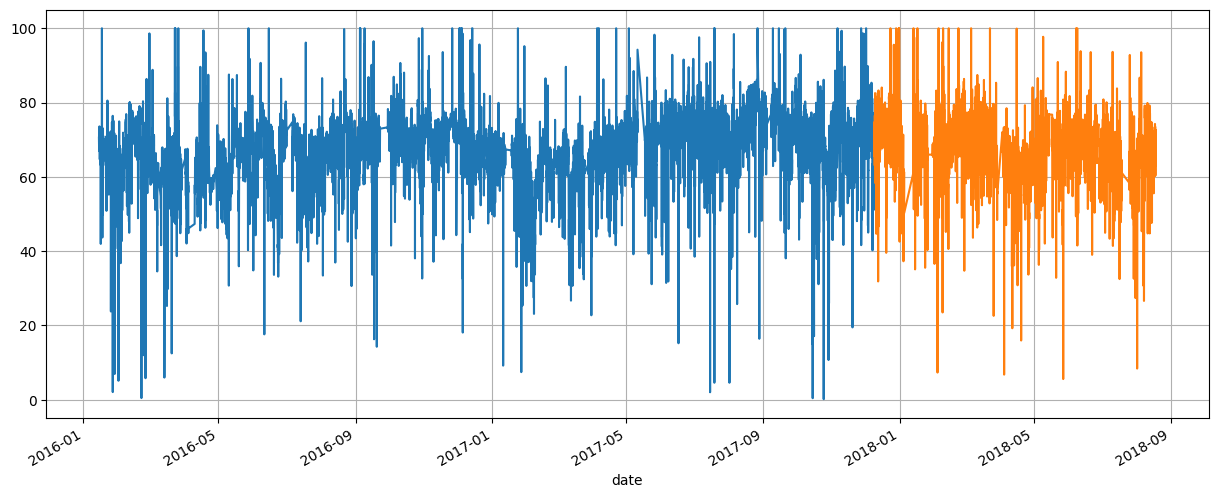

In [ ]:
train['final.output.recovery'].plot(style='-', grid=True, figsize=(15, 6))
full.merge(features_test, 'right', 'date')['final.output.recovery'].plot(style='-', grid=True, figsize=(15, 6));

Распределение верное, тестовые данные для обучающей выборки являются будущим *(по дате)* и не могут "повлиять" на закономерности в обучающих данных.

## Анализ данных

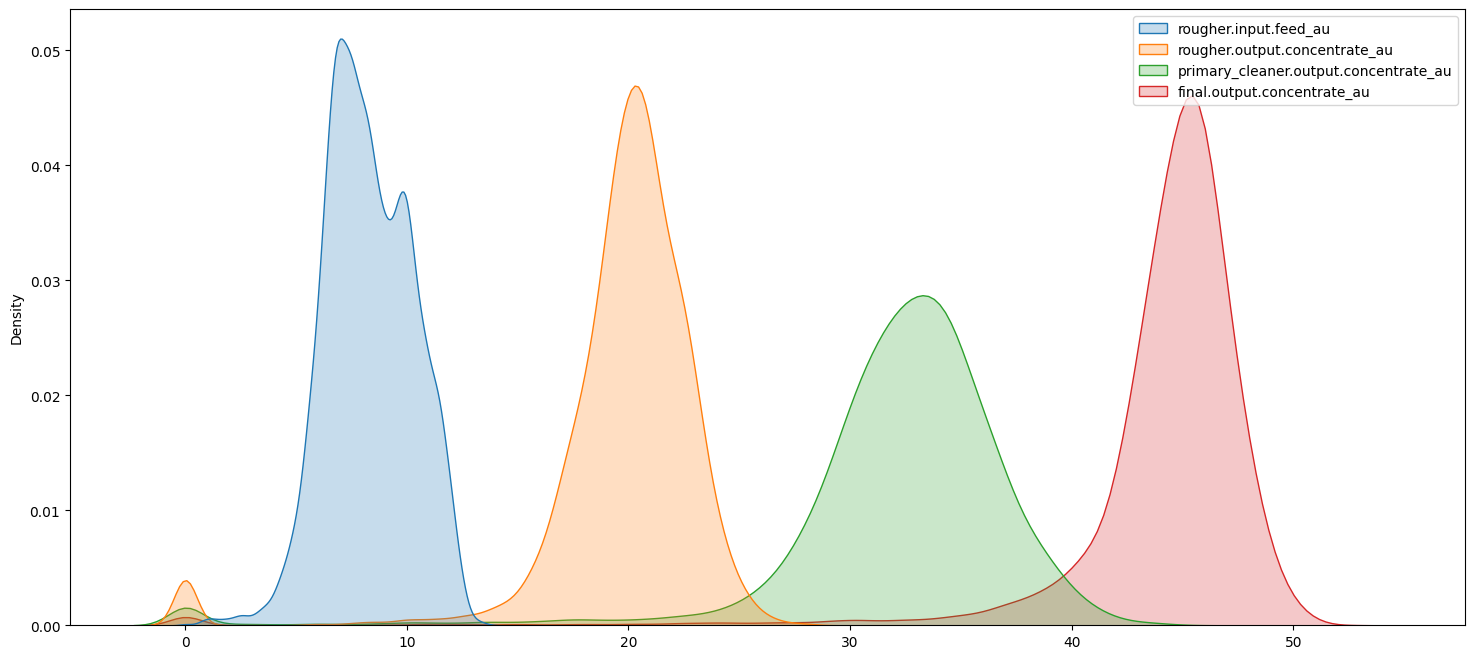

In [ ]:
plt.rcParams['figure.figsize'] = 18, 8
kdeplot(data=full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au','final.output.concentrate_au']],
       fill=True);

Процентная концентрация золота при обработках возрастает. Однако наблюдается некоторый всплеск в зоне нуля. Это явление лучше будет изучить при анализе суммарной концентрации металлов.

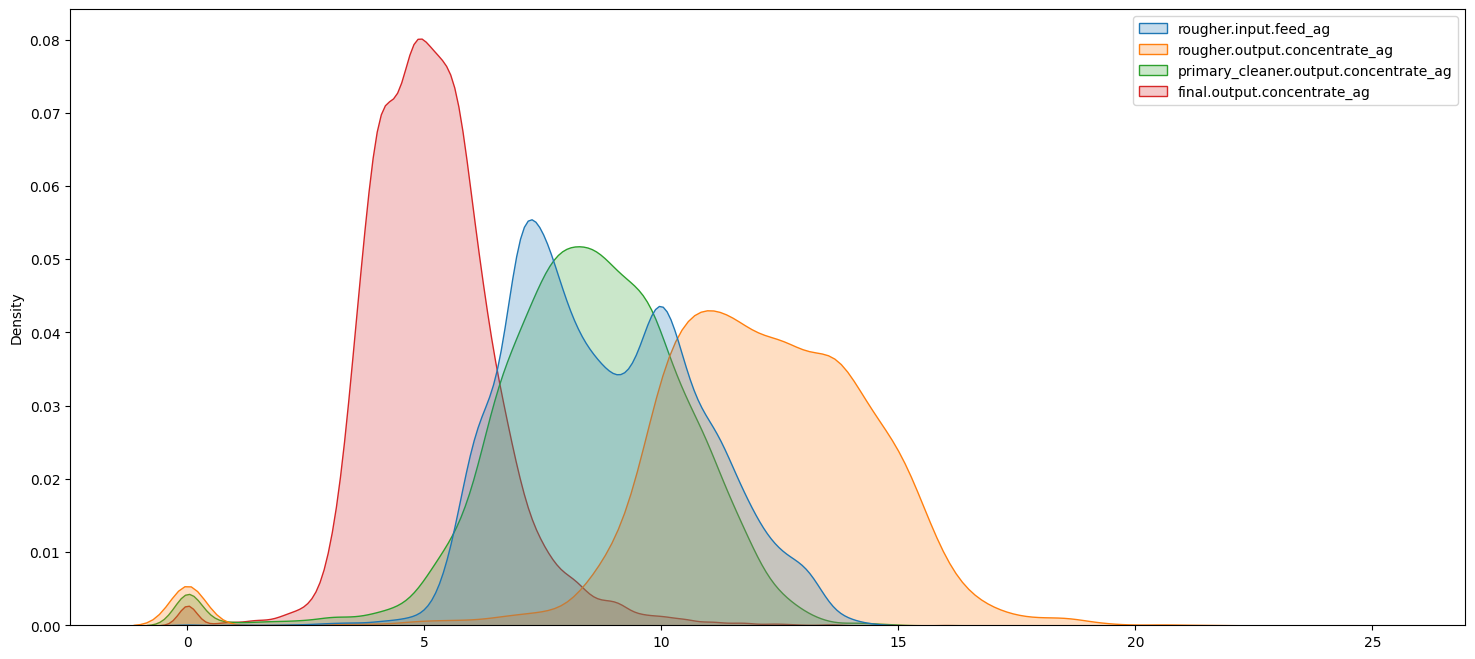

In [ ]:
kdeplot(data=full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']],
       fill=True);

После флотации концентрация серебра в сырье возрастает. Но после прохождения очистки тенденция меняется и содержание серебра уменбшиется вплоть до выходного продукта. Позже обобщим эти выводы.

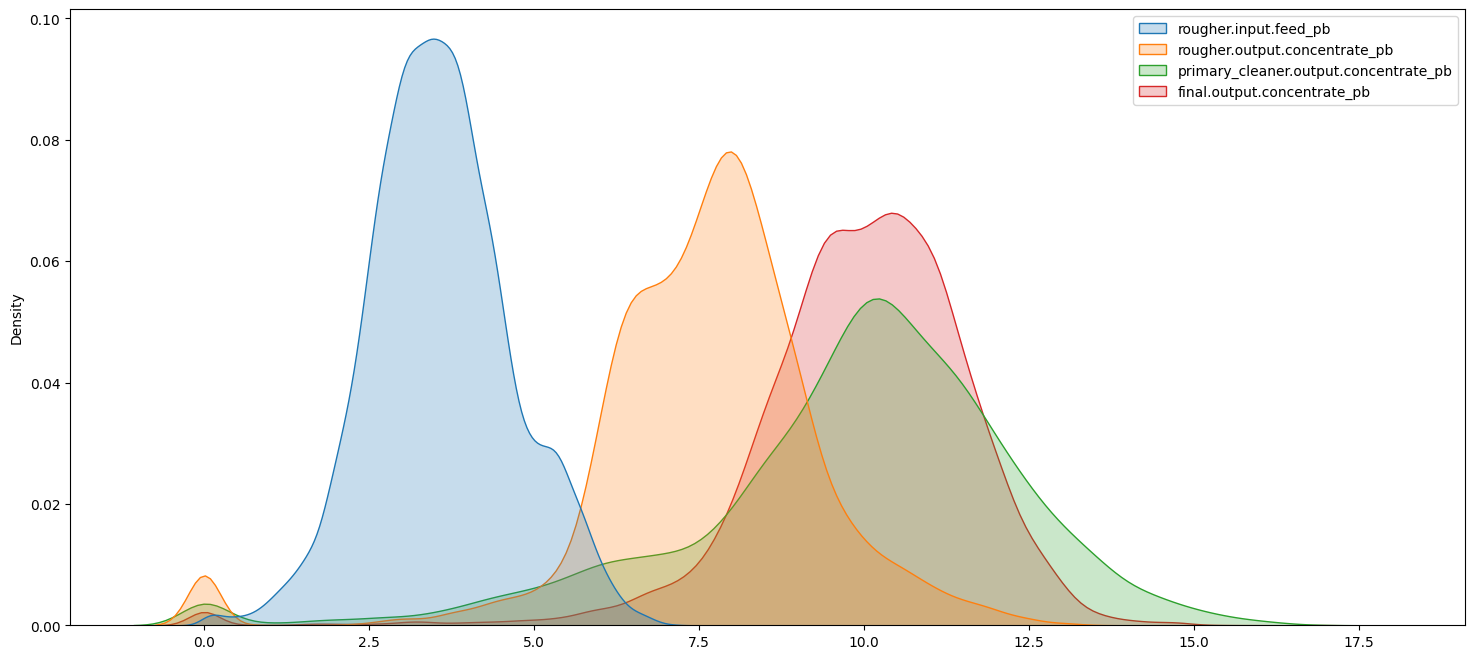

In [ ]:
kdeplot(data=full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']],
       fill=True);

Что видно из гистограм **концентрация золота** на каждом из этапов растёт, что закономерно для текущей задачи. Максимальных сових значений она достигает на финальной стадии и доходит до значений близких к ***50%***. Для остальных металлов ситуация отличается. **Концентрация серебра** после флотаии выросла, но на этапах очистки она уменьшается. На финальном этапе конентрация серебра минимальна и распередлена в области ***5%***. **Для свинца** характерен рост концентрации после флотации и первичной очистки, однако на финальной стадии концентраия лишь более плотно собрана в области ***10%*** и имеет меньшую дисперсию, чем концентрация после первичной очистки.

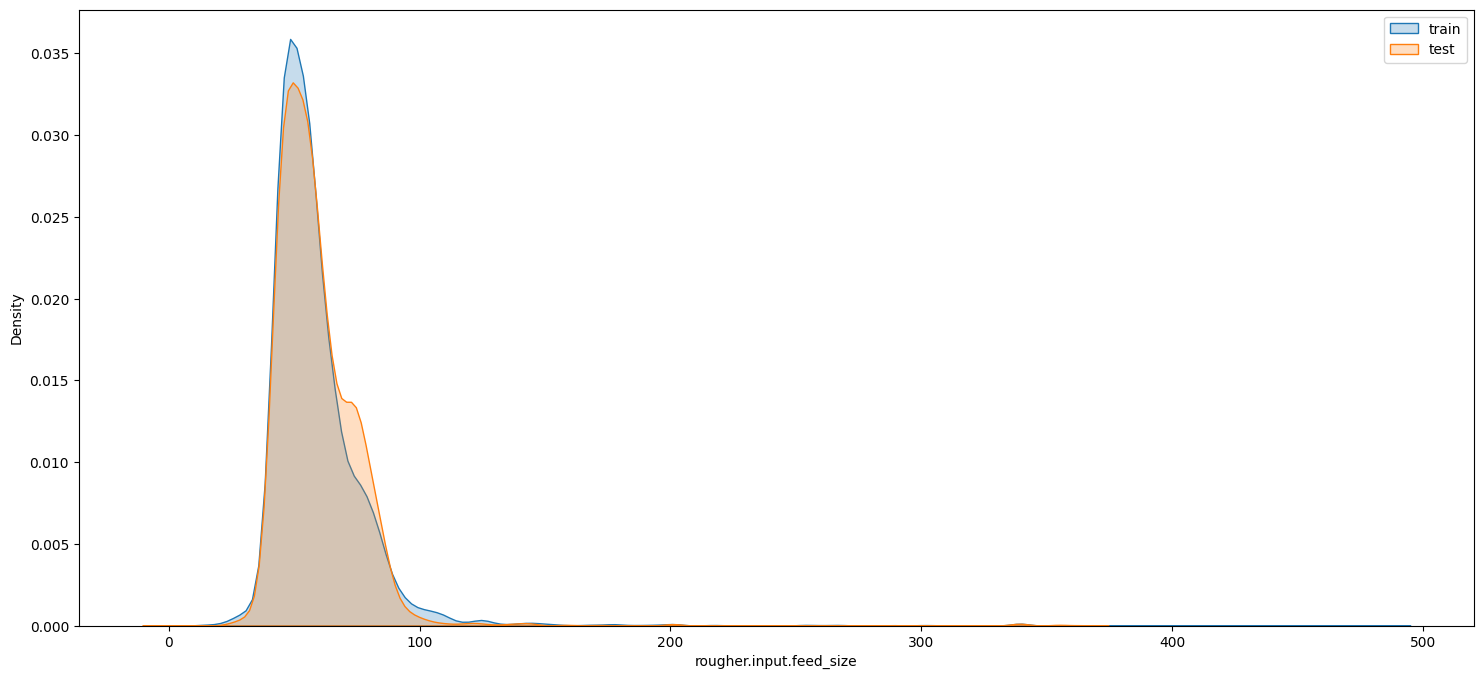

In [ ]:
ax = kdeplot(train['rougher.input.feed_size'], fill=True)
ax = kdeplot(features_test['rougher.input.feed_size'], fill=True)
ax.legend(['train', 'test'])
train['rougher.input.feed_size'].describe();

In [ ]:
print('99%-квантиль', train['rougher.input.feed_size'].quantile(0.99))
print('1%-квантиль', train['rougher.input.feed_size'].quantile(0.01))

99%-квантиль 128.3816743221576
1%-квантиль 35.46830898432288


Размер гранул имеет схожее распределение для тестовой и обучающей выборок, что говорит о том что разделение выполнено верно. Очевидно, что большая часть данных лежит в диапазоне от 35 до 130. Оставшиеся значения наиболее вероятно являются выбросами.  Необходима консультация с экспертом по поводу реальности выбросов. В текущих условиях рекоммендованым решением может быть устранить выбросы.

In [ ]:
train = train[(train['rougher.input.feed_size'] > 35) & (train['rougher.input.feed_size'] < 130)]
features_test = features_test[(features_test['rougher.input.feed_size'] > 35) & (features_test['rougher.input.feed_size'] < 130)]

<ipython-input-25-5999d4770779>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[name[3]] = train[name[0]] + train[name[1]] +  train[name[2]]
<ipython-input-25-5999d4770779>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[name[3]] = train[name[0]] + train[name[1]] +  train[name[2]]


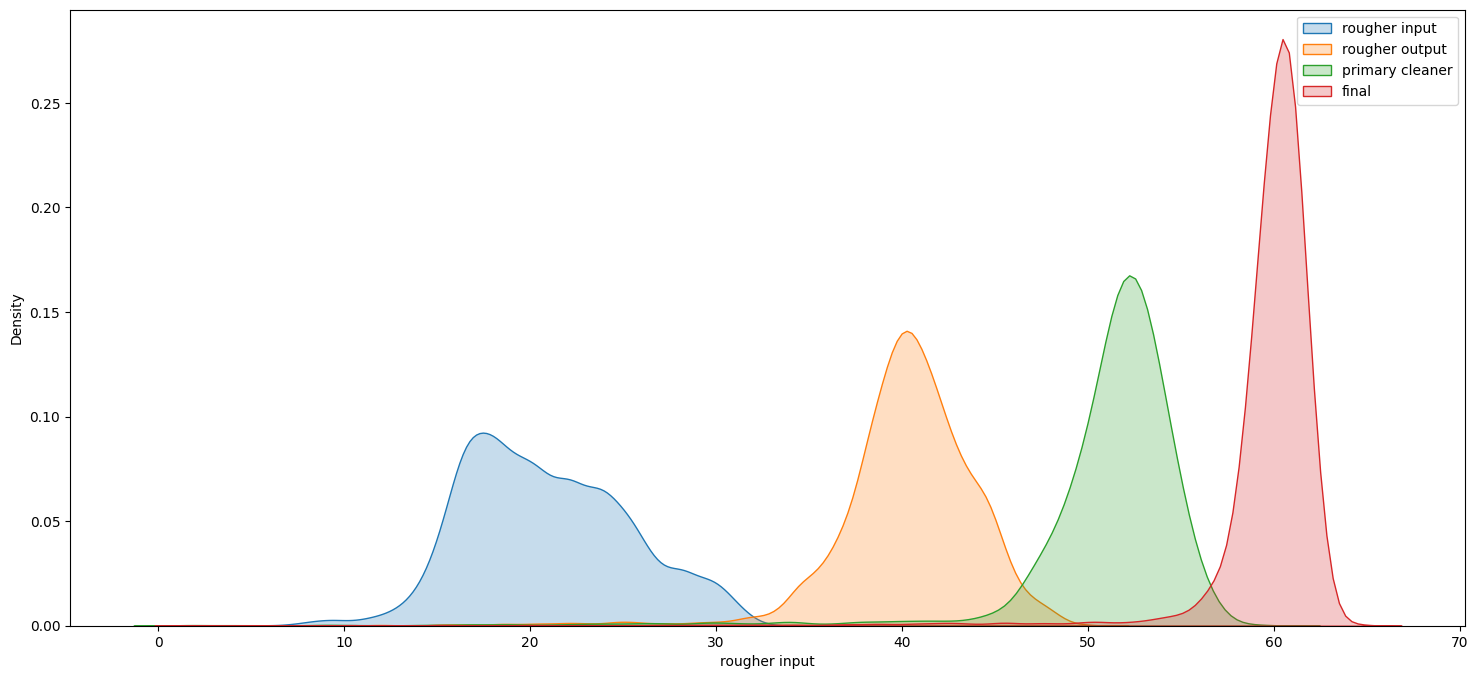

In [ ]:
for name in [['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher input'],
             ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher output'],
             ['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary cleaner'],
             ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final']]:
    train[name[3]] = train[name[0]] + train[name[1]] +  train[name[2]]
    train = train[train[name[3]] > 1]
    ax = kdeplot(data=train[name[3]], fill=True)
ax.legend(['rougher input', 'rougher output', 'primary cleaner', 'final']);

Суммарная концентраия металлов растёт по мере прохождения ээтапов обработки. Увеличивается среднее распределений концентраций и уменьшается их дисперсия. Так же наблюдается большое количество значений на разных этапах концентраий равных нулю. Что не мало важно  и ранее был заметен в сплеск значений в области 0 на гистограммах, это может быть ошибкой или неочевидной закономерностью. Однако такие данные для нас представляют малый интерес поэтому от них стоит избавится.

## Модель

In [ ]:
STATE = 12345

In [ ]:
def sMAPE(y_true, y_pred):
    y_pred = pd.Series(y_pred, index=y_true.index)
    return (2 * abs(y_true - y_pred) / (y_true + y_pred) * 100).sum() / len(y_true)

In [ ]:
sMAPE_score = make_scorer(sMAPE, greater_is_better=False)

In [ ]:
target_rougher_test = full.loc[features_test.index]['rougher.output.recovery']

In [ ]:
features_train = train[list(features_test.columns)]
target_rougher_train = train['rougher.output.recovery']
target_rougher_test = full.loc[features_test.index]['rougher.output.recovery']
target_final_train = train['final.output.recovery']
target_final_test = full.loc[features_test.index]['final.output.recovery']

In [ ]:
regressor = Pipeline(
    steps=[('preprocessor', StandardScaler()), ('models', LinearRegression(n_jobs=-1))]
)

In [ ]:
models__params = [
    #словарь для модели RandomForestRegressor
    {
        'models': [RandomForestRegressor(n_jobs=-1, random_state=STATE)],
        'models__n_estimators': range(100, 350, 50),
        'models__max_depth': range(30, 80, 10),
        'models__max_features': ['auto', 'sqrt'],
        'models__min_samples_leaf': [1, 2, 4],
        'models__min_samples_split': [2, 5, 10]
    },
    #словарь для модели LinearRegression
    {
        'models': [LinearRegression(n_jobs=-1)],
        'models__fit_intercept': [True, False],
        'models__copy_X': [True, False],
        'models__positive': [True, False]
    },
    #словарь для модели DecisionTreeRegressor
    {
        'models': [DecisionTreeRegressor(random_state=STATE)],
        'models__splitter': ['best', 'random'],
        'models__max_depth': range(30, 80, 10),
        'models__min_samples_leaf': [1, 2, 4],
        'models__min_samples_split': [2, 5, 10]

    }
]

In [ ]:
model_rougher = RandomizedSearchCV(
    regressor,
    models__params,
    n_iter=15,
    cv=4,
    scoring=sMAPE_score,
    random_state=STATE,
    n_jobs=-1,
    verbose=1
)

model_final = RandomizedSearchCV(
    regressor,
    models__params,
    n_iter=15,
    cv=4,
    scoring=sMAPE_score,
    random_state=STATE,
    n_jobs=-1,
    verbose=2
)

In [ ]:
%%time

model_rougher.fit(features_train, target_rougher_train)
abs(model_rougher.best_score_)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
CPU times: user 50.9 s, sys: 2.86 s, total: 53.7 s
Wall time: 29min 9s


6.622476042314352

In [ ]:
%%time

model_final.fit(features_train, target_final_train)
abs(model_final.best_score_)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
CPU times: user 41.8 s, sys: 2.38 s, total: 44.2 s
Wall time: 30min 33s


9.008341686060282

In [ ]:
model_rougher.best_estimator_

Pipeline(steps=[('preprocessor', StandardScaler()),
                ('models',
                 RandomForestRegressor(max_depth=30, max_features='sqrt',
                                       min_samples_leaf=2, min_samples_split=5,
                                       n_estimators=250, n_jobs=-1,
                                       random_state=12345))])

In [ ]:
model_final.best_estimator_

Pipeline(steps=[('preprocessor', StandardScaler()),
                ('models',
                 RandomForestRegressor(max_depth=50, max_features='sqrt',
                                       min_samples_leaf=2, min_samples_split=10,
                                       n_estimators=200, n_jobs=-1,
                                       random_state=12345))])

Из всех построенных моделей лучшими оказались модели случайного леса для предсказания эффективности обогащения флотации *(показатель метрики и sMAPE на кроссвалидаци ~ 6.62)* и модель случайного леса для предсказания эффективности обогащения очистки *(показатель метрики sMAPE на кроссвалидаци ~ 9.01)*. Выберем эти модели как лучшие и проверим их качество на тестовой выборке.

In [ ]:
sMAPE_rougher = abs(sMAPE_score(model_rougher.best_estimator_, features_test, target_rougher_test))
print('sMAPE лучшей модели по предсказанию обогащения флотации =', sMAPE_rougher)

sMAPE лучшей модели по предсказанию обогащения флотации = 2.535463027096607


In [ ]:
sMAPE_rougher_const = sMAPE(target_rougher_test, pd.Series(target_rougher_train.median(), index=target_rougher_test.index))
print('sMAPE константной модели построенной по медиане обучающей выборки =', sMAPE_rougher_const)

sMAPE константной модели построенной по медиане обучающей выборки = 5.79740186222146


In [ ]:
sMAPE_final = abs(sMAPE_score(model_final.best_estimator_, features_test, target_final_test))
print('sMAPE лучшей модели по предсказанию обогащения очистки =', sMAPE_final)

sMAPE лучшей модели по предсказанию обогащения очистки = 6.13829536813846


In [ ]:
sMAPE_final_const = sMAPE(target_final_test, pd.Series(target_final_train.median(), index=target_final_test.index))
print('sMAPE константной модели построенной по медиане обучающей выборки =', sMAPE_final_const)

sMAPE константной модели построенной по медиане обучающей выборки = 9.070417989766606


Модели имеют ***меньшее значение метрики***, что является пололжительным результатом и говорит о том, что ***модели проходят проверку на адекватность.***

Следующим шагом вычислим итоговое значение метрики.

In [ ]:
resul_sMAPE = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
print('Итоговый sMAPE =', resul_sMAPE.round(2))

Итоговый sMAPE = 5.24


In [ ]:
resul_sMAPE_const = 0.25 * sMAPE_rougher_const + 0.75 * sMAPE_final_const
print('Итоговый sMAPE для константных моделей =', resul_sMAPE_const.round(2))

Итоговый sMAPE для константных моделей = 8.25


Итоговое значение метрики меньше аналогичного константного, следовательно модели можно рекоммендовать к использованию.

## Общие выводы:

В ходе исследования проекта были изучены представленные датасеты. Была проведена оценка точности расчёта параметра эффективности флотации и расчитана средняя абсолютная ошибка для данного признака. Были определены два целевых признака и выбраны основные для построения модели. В наборах данных были обнаружены пропущенные и выбивающиеся значения, которые можно охаректиризовать как выбросы и выданна рекоммендация о дальнейшей их обработке совместно с экспертом в области золото добычи. Изучены распределения размера гранул и концентраций металлов. Сделаны выводы, что тестовая и обучающая выборки разделены верно как по временному фактору, так и по распределениям входящих параметров. Из обучающего датасета были исключены данные, в которых целевые признаки или концентрация металлов были равны нулю, как наиболее вероятные ошибки. Построены три различные модели обученные с помощью кросс-валидации и поиска гиперпараметров. Определена лучшая модель для обоих целевых признаков и расчитана итоговая ошибка. Проведена оцена моделей на адекватность и выданна рекоммендация на их использование.

## Чек-лист готовности проекта

- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке